In [1]:
RAND_STATE = 42

In [64]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split, learning_curve, cross_validate, ShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from model_analysis import plot_learning_curve

In [25]:
data = pd.read_csv("../saved/cleaned_data_Dec9.csv")
print(data.columns.tolist())
columns = [
    "AuthorRank",
    "JournalNameRank",
    "PublisherRank"
]
dependent_variable_name= "BinnedCitations"

['Unnamed: 0', 'Abstract', 'CitationCount', 'CitationCountPerYear', 'Rank', 'Title', 'YearsSincePublication', 'AuthorProminence', 'MagBin', 'CitationBin', 'AuthorRank', 'JournalNameRank', 'PublisherRank', 'BinnedCitations']


# Create alternate dependent variable

In [ ]:
normalized_cc = df_cs["CitationCountPerYear"].values
normalized_cc.shape

# Data split into train, test, and dev

In [26]:
X, X_test, y, y_test = train_test_split(data.loc[:, columns].values, data.loc[:, dependent_variable_name].values, test_size=0.10, shuffle=True, random_state=RAND_STATE)

X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=RAND_STATE)

print(X_train.shape)
print(X_dev.shape)
print(X_test.shape)

(216078, 3)
(38132, 3)
(28246, 3)


# Support Function

In [27]:
def make_uniform(labels, max_cnt):
    selection= np.zeros_like(labels, dtype=bool)
    for c in range(1, 5):
        cnt = 0
        for i, y in enumerate(labels):
            if cnt == max_cnt: break
            bool_val = y == c
            if bool_val:
                cnt += int(bool_val)
                selection[i] = bool_val
    return selection

def print_model(model, X, y_true):
    y_pred = model.predict(X)
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

## Create Uniform dataset


In [28]:
train_split_idx = np.sum(y_train == 4)
train_selections = make_uniform(y_train, train_split_idx)
X_train_uniform = X_train[train_selections]
y_train_uniform = y_train[train_selections]

dev_split_idx = np.sum(y_dev == 4)
dev_selections = make_uniform(y_dev, dev_split_idx)
X_dev_uniform = X_dev[dev_selections]
y_dev_uniform = y_dev[dev_selections]

print(X_train_uniform.shape)
print(X_dev_uniform.shape)

(23536, 3)
(4236, 3)


# Model analysis
## Multi-layer Perceptron Model (Neural Network)

In [59]:
from sklearn.neural_network import MLPClassifier
ss = StandardScaler()
nn = MLPClassifier(
    hidden_layer_sizes=(32, 64, 32, 16, 8), 
    max_iter=500,
    alpha=0.0001, 
    learning_rate='adaptive',
    early_stopping=True
    )

0.4351631543167913
1.200479917229451


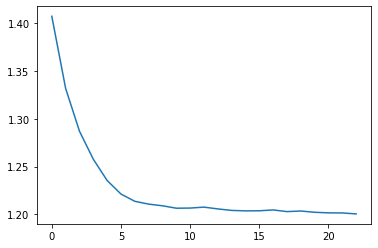

In [60]:
model_pipeline = Pipeline(steps=[('ss', ss), ('nn', nn)])
model_pipeline.fit(X_train_uniform, y_train_uniform)
print(model_pipeline.score(X_train_uniform, y_train_uniform))
print(model_pipeline.named_steps['nn'].loss_)

ll = model_pipeline.named_steps['nn'].loss_curve_
plt.plot(ll)

In [61]:
print_model(model_pipeline, X_dev_uniform, y_dev_uniform)

[[646 189 147  77]
 [405 269 200 185]
 [180 190 290 399]
 [ 93 103 198 665]]
              precision    recall  f1-score   support

           1       0.49      0.61      0.54      1059
           2       0.36      0.25      0.30      1059
           3       0.35      0.27      0.31      1059
           4       0.50      0.63      0.56      1059

    accuracy                           0.44      4236
   macro avg       0.42      0.44      0.43      4236
weighted avg       0.42      0.44      0.43      4236



In [62]:
print_model(model_pipeline, X_dev, y_dev)

[[10197  3129  2354  1044]
 [ 5431  3465  3307  2513]
 [  950   985  1497  2201]
 [   93   103   198   665]]
              precision    recall  f1-score   support

           1       0.61      0.61      0.61     16724
           2       0.45      0.24      0.31     14716
           3       0.20      0.27      0.23      5633
           4       0.10      0.63      0.18      1059

    accuracy                           0.41     38132
   macro avg       0.34      0.43      0.33     38132
weighted avg       0.48      0.41      0.43     38132

